# **Homework 4** Problem 3

## (a) Prepare CRUW_MINI dataset

Download CRUW_MINI dataset and unzip to your colab. 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/PMP596/dataset/cruw/
!unzip CRUW_MINI_AU21.zip

Streaming output truncated to the last 5000 lines.
  inflating: sequences/train/2019_04_09_CMS1002_PL_NORMAL/IMAGES_0/0000000388.jpg  
  inflating: sequences/train/2019_04_09_CMS1002_PL_NORMAL/IMAGES_0/0000000389.jpg  
  inflating: sequences/train/2019_04_09_CMS1002_PL_NORMAL/IMAGES_0/0000000390.jpg  
  inflating: sequences/train/2019_04_09_CMS1002_PL_NORMAL/IMAGES_0/0000000391.jpg  
  inflating: sequences/train/2019_04_09_CMS1002_PL_NORMAL/IMAGES_0/0000000392.jpg  
  inflating: sequences/train/2019_04_09_CMS1002_PL_NORMAL/IMAGES_0/0000000393.jpg  
  inflating: sequences/train/2019_04_09_CMS1002_PL_NORMAL/IMAGES_0/0000000394.jpg  
  inflating: sequences/train/2019_04_09_CMS1002_PL_NORMAL/IMAGES_0/0000000395.jpg  
  inflating: sequences/train/2019_04_09_CMS1002_PL_NORMAL/IMAGES_0/0000000396.jpg  
  inflating: sequences/train/2019_04_09_CMS1002_PL_NORMAL/IMAGES_0/0000000397.jpg  
  inflating: sequences/train/2019_04_09_CMS1002_PL_NORMAL/IMAGES_0/0000000398.jpg  
  inflating: sequences/tr

### Install CRUW dataset devkit

In [ ]:
%cd /content
!git clone https://github.com/yizhou-wang/cruw-devkit.git
%cd cruw-devkit/
!pip install -e .
%cd ..

/content
Cloning into 'cruw-devkit'...
remote: Enumerating objects: 90, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 90 (delta 28), reused 76 (delta 18), pack-reused 0
Unpacking objects: 100% (90/90), done.
/content/cruw-devkit
Obtaining file:///content/cruw-devkit
  Running setup.py develop for cruw-devkit
/content


### Visualize some examples in CRUW_MINI

Note: You need to **restart** your runtime before importing `cruw` package.

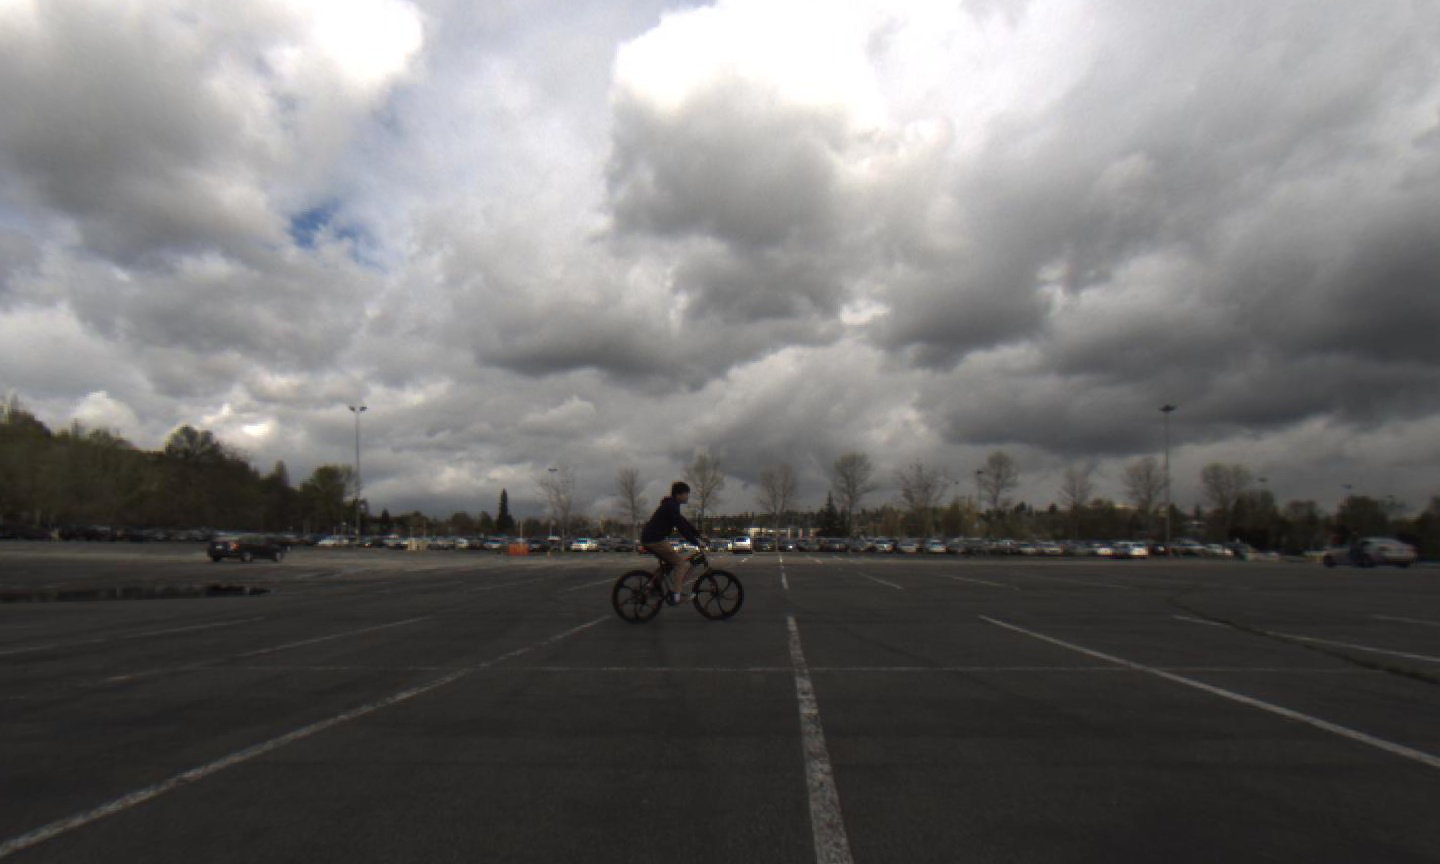

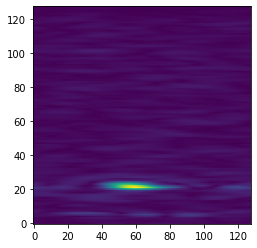

In [ ]:
import os
from cruw.cruw import CRUW
from cruw.visualization.draw_rf import magnitude
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

data_root = '/content/gdrive/MyDrive/PMP596/dataset/cruw/'
dataset = CRUW(data_root=data_root, sensor_config_name='sensor_config')

# left camera image
display(Image(os.path.join(data_root, 'sequences/train/2019_04_09_BMS1000_PL_NORMAL/IMAGES_0/0000000000.jpg'), width=300))
# radar frequency map
plt.imshow(magnitude(np.load(os.path.join(data_root, 'sequences/train/2019_04_09_BMS1000_PL_NORMAL/RADAR_RA_H/000238.npy')), 
                     radar_data_type=dataset.sensor_cfg.radar_cfg['data_type']), 
           origin='lower')

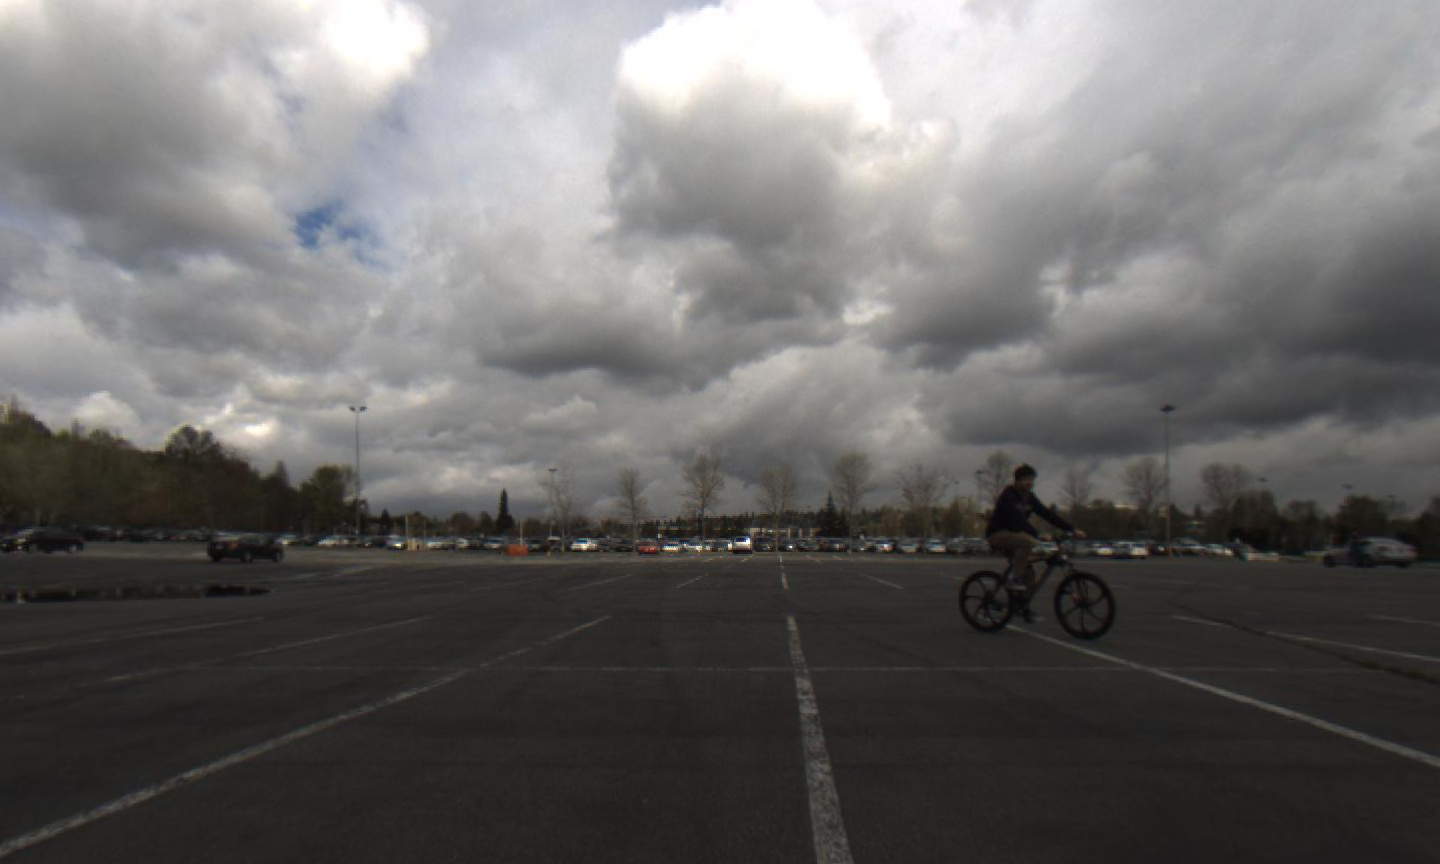

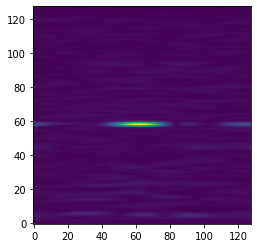

In [ ]:
# TODO: visualize some other images in CRUW
# left camera image
display(Image(os.path.join(data_root, 'sequences/train/2019_04_09_BMS1000_PL_NORMAL/IMAGES_0/0000000100.jpg'), width=300))
# radar frequency map
plt.imshow(magnitude(np.load(os.path.join(data_root, 'sequences/train/2019_04_09_BMS1000_PL_NORMAL/RADAR_RA_H/000400.npy')), 
                     radar_data_type=dataset.sensor_cfg.radar_cfg['data_type']), 
           origin='lower')

## (b) Train RODNet

### Install RODNet package

In [ ]:
!git clone https://github.com/yizhou-wang/RODNet.git
%cd RODNet/
!pip install -e .

Cloning into 'RODNet'...
remote: Enumerating objects: 1735, done.
remote: Counting objects: 100% (1735/1735), done.
remote: Compressing objects: 100% (1646/1646), done.
remote: Total 1735 (delta 102), reused 1709 (delta 79), pack-reused 0
Receiving objects: 100% (1735/1735), 1.70 MiB | 15.24 MiB/s, done.
Resolving deltas: 100% (102/102), done.
/content/RODNet/RODNet
Obtaining file:///content/RODNet/RODNet
  Running setup.py develop for rodnet


### Prepare data for RODNet training and inference

**Note**: Remember to change data paths in your configuration file.

In [ ]:
!python tools/prepare_dataset/prepare_data.py --config configs/config_rodnet_cdc_win16_mini.py --sensor_config sensor_config --data_root /content/gdrive/MyDrive/PMP596/dataset/cruw/ --split train,test --out_data_dir data/cruw_mini

Preparing train sets ...
Traceback (most recent call last):
  File "tools/prepare_dataset/prepare_data.py", line 231, in <module>
    prepare_data(dataset, config_dict, out_data_dir, split, save_dir, viz=False, overwrite=overwrite)
  File "tools/prepare_dataset/prepare_data.py", line 108, in prepare_data
    sets_seqs = sorted(os.listdir(os.path.join(data_root, set_cfg['subdir'])))
FileNotFoundError: [Errno 2] No such file or directory: '/mnt/disk2/CRUW/CRUW_MINI_AU21/sequences/train'


Visualize some generated ConfMaps.

In [ ]:
import pickle
data_details = pickle.load(open('/content/RODNet/data/cruw_mini/train/2019_05_29_MLMS006_CR_BLUR.pkl', 'rb'))
print(data_details.keys())

dict_keys(['data_root', 'data_path', 'seq_name', 'n_frame', 'image_paths', 'radar_paths', 'anno'])


In [ ]:
annotations = data_details['anno']
print(annotations.keys())

dict_keys(['metadata', 'confmaps'])


In [ ]:
metadata = annotations['metadata']
confmaps = annotations['confmaps']
print(confmaps.shape)

(900, 4, 128, 128)


{'folder_name': 'RADAR_RA_H', 'frame_name': '000238.npy', 'range': 128, 'azimuth': 128, 'n_chirps': 255, 'n_objects': 2, 'obj_info': {'anno_source': 'human', 'categories': ['cyclist', 'car'], 'centers': [[16.505093852521462, -0.6981317007977317], [9.813839587985735, -0.5585053606381853]], 'center_ids': [[74, 23], [43, 30]], 'scores': [1.0, 1.0]}}


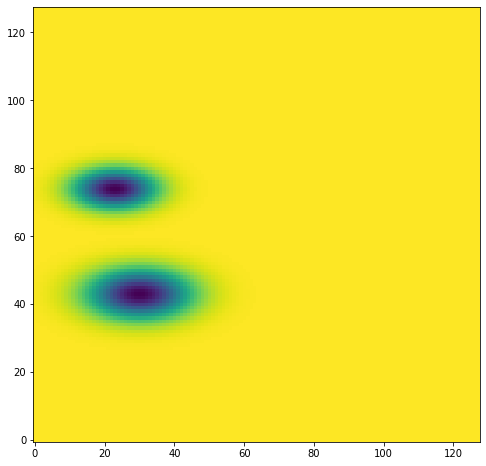

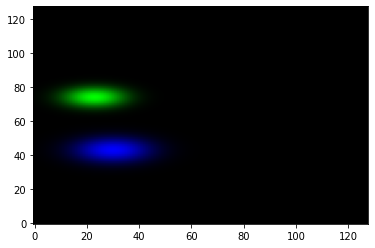

In [ ]:
from rodnet.utils.visualization.confmap import visualize_confmap

print(metadata[238]['rad_h'])
visualize_confmap(confmaps[238])

### Train RODNet

Train the RODNet using the configuration named `config_rodnet_cdc_win16.py` for at least 5 epochs.

In [ ]:
%cd /content/RODNet/
!ls

/content/RODNet
assets	     data	requirements.txt  RODNet	   tools
checkpoints  LICENSE	results		  rodnet.egg-info
configs      README.md	rodnet		  setup.py


In [ ]:
!python tools/train.py --config configs/config_rodnet_cdc_win16_mini.py --sensor_config sensor_config --data_dir data/cruw_mini/ --log_dir checkpoints/rodnet_cdc_win16_mini

Building dataloader ... (Mode: normal)
100% 4/4 [00:02<00:00,  1.73it/s]
Building model ... ({'type': 'CDC', 'name': 'rodnet-cdc-win16-wobg', 'max_dets': 20, 'peak_thres': 0.3, 'ols_thres': 0.3})
Model name: rodnet-cdc-win16-wobg-20211127-032422
Number of sequences to train: 4
Training dataset length: 885
Batch size: 4
Number of iterations in each epoch: 221
epoch  1, iter    1: loss: 0.00771133 | load time: 0.1606 | backward time: 1.1755
epoch  1, iter  101: loss: 0.00302903 | load time: 0.1311 | backward time: 1.5396
epoch  1, iter  201: loss: 0.00178886 | load time: 0.1547 | backward time: 1.5059
saving current epoch model ...
epoch  2, iter    1: loss: 0.00256246 | load time: 0.1350 | backward time: 1.1301
epoch  2, iter  101: loss: 0.00241978 | load time: 0.1320 | backward time: 1.5335
epoch  2, iter  201: loss: 0.00111683 | load time: 0.1473 | backward time: 1.5224
saving current epoch model ...
epoch  3, iter    1: loss: 0.00109133 | load time: 0.1339 | backward time: 1.1322
epo

Create a new configuration file named `config_rodnet_cdc_win1.py`. Change the `win_size` from 16 to 1. Train the RODNet again for at least 5 epochs.

In [ ]:
# TODO
!python tools/train.py --config configs/config_rodnet_cdc_win1.py --sensor_config sensor_config --data_dir data/cruw_mini/ --log_dir checkpoints/rodnet_cdc_win1_mini

Building dataloader ... (Mode: normal)
100% 4/4 [00:02<00:00,  1.80it/s]
Building model ... ({'type': 'CDC', 'name': 'rodnet-cdc-win1-wobg', 'max_dets': 20, 'peak_thres': 0.3, 'ols_thres': 0.3})
Model name: rodnet-cdc-win1-wobg-20211127-041058
Number of sequences to train: 4
Training dataset length: 900
Batch size: 4
Number of iterations in each epoch: 225
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([4, 3, 1, 128, 128])) that is different to the input size (torch.Size([4, 3, 4, 128, 128])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
epoch  1, iter    1: loss: 0.00353174 | load time: 0.0125 | backward time: 0.2676
epoch  1, iter  101: loss: 0.00236674 | load time: 0.0108 | backward time: 0.3582
epoch  1, iter  201: loss: 0.00278658 | load time: 0.0095 | backward time: 0.3584
saving current epoch mod

## (c) Inference and Visualization 

Infer radar object detection results from the two models you just trained.

In [ ]:
!python tools/test.py --config configs/config_rodnet_cdc_win16_mini.py --sensor_config sensor_config --data_dir data/cruw_mini/ --checkpoint /content/RODNet/checkpoints/rodnet_cdc_win16_mini/rodnet-cdc-win16-wobg-20211127-032422/epoch_10_final.pkl --res_dir results/

Building model ... ({'type': 'CDC', 'name': 'rodnet-cdc-win16-wobg', 'max_dets': 20, 'peak_thres': 0.3, 'ols_thres': 0.3})
['2019_05_29_PBMS007_PL_BLUR']
2019_05_29_PBMS007_PL_BLUR
100% 1/1 [00:02<00:00,  2.16s/it]
Length of testing data: 111
Testing 2019_05_29_PBMS007_PL_BLUR: 0000000000-0000000015
Load time: 0.0546 | Inference time: 0.2061 | Process time: 5.1952
Testing 2019_05_29_PBMS007_PL_BLUR: 0000000008-0000000023
Load time: 0.0353 | Inference time: 0.1665 | Process time: 5.1481
Testing 2019_05_29_PBMS007_PL_BLUR: 0000000016-0000000031
Load time: 0.0354 | Inference time: 0.1550 | Process time: 5.1305
Testing 2019_05_29_PBMS007_PL_BLUR: 0000000024-0000000039
Load time: 0.0345 | Inference time: 0.1563 | Process time: 5.1385
Testing 2019_05_29_PBMS007_PL_BLUR: 0000000032-0000000047
Load time: 0.0369 | Inference time: 0.1558 | Process time: 5.2261
Testing 2019_05_29_PBMS007_PL_BLUR: 0000000040-0000000055
Load time: 0.0377 | Inference time: 0.1549 | Process time: 5.1889
Testing 2019_

In [ ]:
!python tools/test.py --config configs/config_rodnet_cdc_win1.py --sensor_config sensor_config --data_dir data/cruw_mini/ --checkpoint /content/RODNet/checkpoints/rodnet_cdc_win1_mini/rodnet-cdc-win1-wobg-20211127-041058/epoch_10_final.pkl --res_dir results/

Building model ... ({'type': 'CDC', 'name': 'rodnet-cdc-win1-wobg', 'max_dets': 20, 'peak_thres': 0.3, 'ols_thres': 0.3})
['2019_05_29_PBMS007_PL_BLUR']
2019_05_29_PBMS007_PL_BLUR
100% 1/1 [00:00<00:00,  1.51it/s]
Length of testing data: 113
Testing 2019_05_29_PBMS007_PL_BLUR: 0000000000-0000000000
Traceback (most recent call last):
  File "tools/test.py", line 210, in <module>
    img_path = image_paths[i]
IndexError: list index out of range


Infer radar object detection results from the downloaded pre-trained model.

In [ ]:
# TODO

!python tools/test.py --config configs/config_rodnet_cdc_win16_mini.py --sensor_config sensor_config --data_dir data/cruw_mini/ --checkpoint /content/RODNet/checkpoints/pretrained/rodnet_cdc_win16_cruw_mini_epoch50.pkl --res_dir results/

Building model ... ({'type': 'CDC', 'name': 'rodnet-cdc-win16-wobg', 'max_dets': 20, 'peak_thres': 0.3, 'ols_thres': 0.3})
['2019_05_29_PBMS007_PL_BLUR']
2019_05_29_PBMS007_PL_BLUR
100% 1/1 [00:00<00:00,  1.57it/s]
Length of testing data: 111
Testing 2019_05_29_PBMS007_PL_BLUR: 0000000000-0000000015
Load time: 0.0431 | Inference time: 0.1873 | Process time: 5.5493
Testing 2019_05_29_PBMS007_PL_BLUR: 0000000008-0000000023
Load time: 0.0402 | Inference time: 0.1668 | Process time: 5.3382
Testing 2019_05_29_PBMS007_PL_BLUR: 0000000016-0000000031
Load time: 0.0338 | Inference time: 0.1669 | Process time: 5.2928
Testing 2019_05_29_PBMS007_PL_BLUR: 0000000024-0000000039
Load time: 0.0423 | Inference time: 0.1575 | Process time: 5.2835
Testing 2019_05_29_PBMS007_PL_BLUR: 0000000032-0000000047
Load time: 0.0426 | Inference time: 0.1549 | Process time: 5.3110
Testing 2019_05_29_PBMS007_PL_BLUR: 0000000040-0000000055
Load time: 0.0437 | Inference time: 0.1564 | Process time: 5.3865
Testing 2019_

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r /content/RODNet /content/gdrive/MyDrive/UW/EEP596

In [ ]:
!cp -r /content/drive/MyDrive/UW/EEP596/RODNet /content

cp: cannot stat '/content/drive/MyDrive/UW/EEP596/RODNet/content': No such file or directory


### Show the visualization results

The package will automatically save the testing visualization at `RODNet/results/<MODEL_NAME>/<SEQ_NAME>/rod_viz/xxxxxxxxxx.jpg`. Please show your visualization results in this colab notebook. 

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Text(0.5, 1.0, '#6')

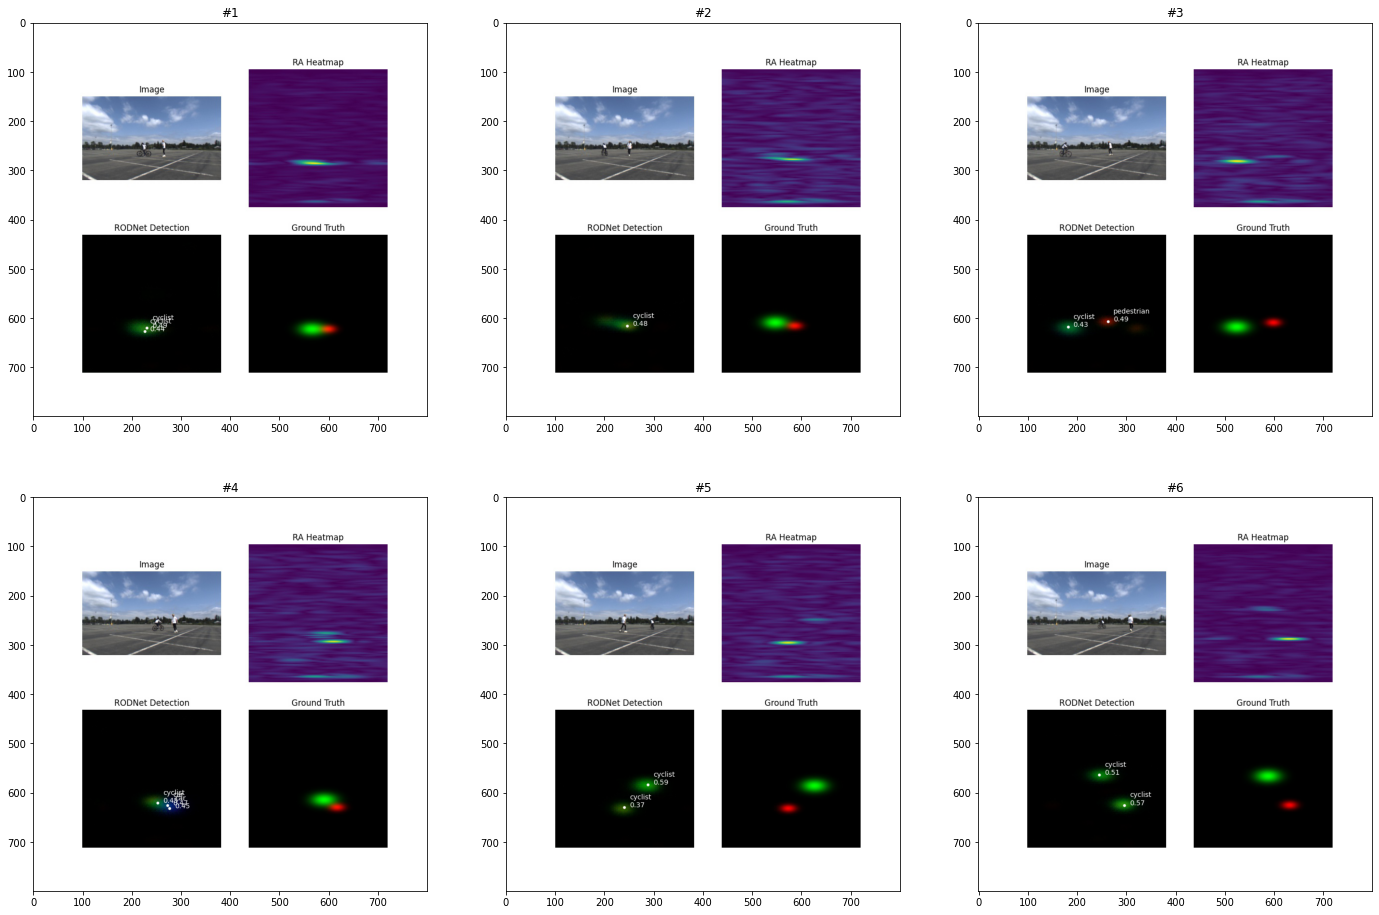

In [ ]:
# TODO
img1 = mpimg.imread('/content/RODNet/results/rodnet-cdc-win16-wobg-20211127-032422/2019_05_29_PBMS007_PL_BLUR/rod_viz/0000000000.jpg')
img2 = mpimg.imread('/content/RODNet/results/rodnet-cdc-win16-wobg-20211127-032422/2019_05_29_PBMS007_PL_BLUR/rod_viz/0000000100.jpg')
img3 = mpimg.imread('/content/RODNet/results/rodnet-cdc-win16-wobg-20211127-032422/2019_05_29_PBMS007_PL_BLUR/rod_viz/0000000200.jpg')
img4 = mpimg.imread('/content/RODNet/results/rodnet-cdc-win16-wobg-20211127-032422/2019_05_29_PBMS007_PL_BLUR/rod_viz/0000000300.jpg')
img5 = mpimg.imread('/content/RODNet/results/rodnet-cdc-win16-wobg-20211127-032422/2019_05_29_PBMS007_PL_BLUR/rod_viz/0000000400.jpg')
img6 = mpimg.imread('/content/RODNet/results/rodnet-cdc-win16-wobg-20211127-032422/2019_05_29_PBMS007_PL_BLUR/rod_viz/0000000500.jpg')


fig = plt.figure(figsize=[24, 16])
ax = fig.add_subplot(2, 3, 1)
imgplot = plt.imshow(img1)
ax.set_title('#1')

ax = fig.add_subplot(2, 3, 2)
imgplot = plt.imshow(img2)
ax.set_title('#2')

ax = fig.add_subplot(2, 3, 3)
imgplot = plt.imshow(img3)
ax.set_title('#3')

ax = fig.add_subplot(2, 3, 4)
imgplot = plt.imshow(img4)
ax.set_title('#4')

ax = fig.add_subplot(2, 3, 5)
imgplot = plt.imshow(img5)
ax.set_title('#5')

ax = fig.add_subplot(2, 3, 6)
imgplot = plt.imshow(img6)
ax.set_title('#6')

## (d) Discussions

Write your answers to the discussions here.

What’s the detection result difference between win_size = 1 and 16? Why do we need
to input clips of frames instead of input single frames like image-based object detection?


The resolution will be different between win_size = 1 and 16.
We need to input clips of frames instead of input single frames because we need a clip of frames to discover an “action” in clips. 

During your experiments, list some failure cases. Explain the probable reason for the
failures and give some ideas for improvement.


When two objects are occluded, it will cause failure cases.
The reason is that it is hard for the model to destinct two overlapped objects.
Adding different angle of the dataset can help to improve the result.